In [149]:
# Import packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [150]:
import os 
os.chdir("/Users/ryantso/Desktop/RCC_Code")

In [151]:
# Create a reference dictionary to categorize the subtypes into their broader categories (organizing rows)
subtype_categories = ["RCC with clear cells",
                      "RCC with eosinophilic cells",
                      "Low-grade FH-deficient RCC",
                      "RCC with low-grade papillary lesion",
                      "RCC with high-grade papillary lesion",
                      "RCC with infiltrative pattern"]

RCC_CC = ["Clear cell RCC",
          "Multilocular cystic renal neoplasm of low malignant potential",
          "Clear cell papillary renal cell tumour w/ clear cell",
          "Papillary RCC w/ clear cell",
          "ELOC-mutated RCC / RCC with fibromyomatous stroma",
          "TFE3-rearranged RCC w/ clear cell"]

RCC_EC = ["Oncocytoma",
           "Chromophobe RCC",
           "Eosinophilic vacuolated tumour",
           "Eosinophilic solid and cystic RCC",
           "Low-grade oncocytic tumour",
           "TFEB-rearranged RCC",
           "Succinate dehydrogenase-deficient RCC"]

RCC_LGPL = ["Papillary RCC w/ low grade papillary",
            "Papillary renal neoplasm with reverse polarity",
            "Clear cell papillary renal cell tumour w/ low grade papillary",
            "Metanephric adenoma",
            "Mucinous tubular and spindle cell carcinoma"]

RCC_HGPL = ["Papillary RCC w/ high grade papillary",
            "Fumarate hydratase-deficient RCC",
            "TFE3-rearranged RCC w/ high grade papillary",
            "TFEB-amplified RCC",
            "Acquired Cystic Disease-Associated RCC",
            "Tubulocystic Carcinoma"]

RCC_IP = ["Collecting Duct Carcinoma",
            "SMARCB1-deficient Renal Medullary Carcinoma",
            "ALK-rearranged RCC",
            "Urothelial Carcinoma"]

# Organizing morphological features (columns)
feature_categories = ["Pattern","Cell Shape and Color","Nuclear Grade", "Cellular Feature", "Stroma", "Other Features"]

Pattern = ["Cystic",
           "Tubular",
           "Tubulocystic",
           "Cribriform/Adenocarcinoma-like",
           "Sieve-like with crystals",
           "Solid/Nested",
           "Papillary/Tubulopapillary",
           "Infiltrative"]

Cell_Shape_and_Color = ["Clear",
                        "Eosinophilic",
                        "Basophilic",
                        "Spindle Shaped"]

Nuclear_grade = ["Low","High"]

Cellular_Features = ["Inclusion-like nucleoli",
                    "Nuclei in reverse polarity",
                    "Raisinoid nuclei with perinuclear halo",
                    "Clear granular cytoplasm",
                    "Plant-like  cell membrane",
                    "Basophilic stippling"]

Stroma = ["Thick fibromuscular stroma",
          "Desmoplastic stroma"]

Other_Features = ["Foamy macrophages",
                  "Mucin",
                  "Calcium oxalate crystals",
                  "End-stage renal disease background",
                  "True Necrosis"]

morphological_features = Pattern + Cell_Shape_and_Color + Nuclear_grade + Cellular_Features + Stroma + Other_Features

# Create list of Immunohistochemical Features 

IHC_features = ["PAX8", "CAIX", "CD10",	"CK7",	"AMACR",
                "CD117", "Vimentin", "TFE3", "Cathepsin K", "HMB45", 
                "Melan A", "FH", "2SC", "SDHB", "ALK", "SMARCB1 (INI1)",
                "OCT 3/4", "GATA3", "CK20", "CK-Pan " , "EMA", 
                "LMWCK", "WT1","CD57", "p63"] 
# IHC stains that were missing too much information 
NA_IHC_features = ["Ki67 labelling index (%)","PAX2", "ER", "PR", "S100"]

# create a dictionary to map subtypes to categories

metadata = {
    "Subtype Categories": subtype_categories,
    "RCC with Clear Cells": RCC_CC,
    "RCC with Eosinophilic Cells": RCC_EC,
    "RCC with Low-Grade Papillary Lesions": RCC_LGPL,
    "RCC with High-Grade Papillary Lesions": RCC_HGPL,
    "RCC with Infiltrative Pattern": RCC_IP,

    "Pattern": Pattern,
    "Cell Shape and Color": Cell_Shape_and_Color,
    "Nuclear Grade": Nuclear_grade,
    "Cellular Feature": Cellular_Features,
    "Stroma": Stroma,
    "Other Features": Other_Features}

In [152]:
print(morphological_features)

['Cystic', 'Tubular', 'Tubulocystic', 'Cribriform/Adenocarcinoma-like', 'Sieve-like with crystals', 'Solid/Nested', 'Papillary/Tubulopapillary', 'Infiltrative', 'Clear', 'Eosinophilic', 'Basophilic', 'Spindle Shaped', 'Low', 'High', 'Inclusion-like nucleoli', 'Nuclei in reverse polarity', 'Raisinoid nuclei with perinuclear halo', 'Clear granular cytoplasm', 'Plant-like  cell membrane', 'Basophilic stippling', 'Thick fibromuscular stroma', 'Desmoplastic stroma', 'Foamy macrophages', 'Mucin', 'Calcium oxalate crystals', 'End-stage renal disease background', 'True Necrosis']


In [153]:
# Priority IHC stains for specific subtypes (variable naming convnetion: subtype_prioritiy_IHC stains)

# Clear cell papillary renal cell tumour w/ clear cell
CC_PRCT_pri_IHC = ["CAIX", "CD10", "CK7", "AMACR", "GATA3"]

# Clear cell RCC
CC_RCC_pri_IHC = ["CAIX", "CD10", "CK7", "AMACR"]

# ELOC-mutated RCC / RCC with fibromyomatous stroma
ELOC_RCC_pri_IHC = ["CAIX", "CD10", "CK7", "AMACR", "GATA3"]

# Multilocular cystic renal neoplasm of low malignant potential
MCRN_LMP_pri_IHC = ["CAIX", "CD10", "CK7", "GATA3"]

# TFE3-rearranged RCC
TFE3_RRCC_pri_IHC = ["CAIX", "TFE3", "LMWCK", "CD10"]

# Papillary RCC
PRCC_pri_IHC = ["AMACR", "CK7", "CAIX", "LMWCK", "TFE3"]

In [154]:
# Select Reference 
# TO DO: Edit so that user inputs what they are looking for, which subtypes specifically and allow for interchange 

ref_morph_df = pd.read_csv("ref_sd_morph_rcc_2025.11.18.csv")

subtype_groups = {
    "CC": RCC_CC,       # clear cell group list
    "EC": RCC_EC,       # eosinophilic cells group list
    "LGPL": RCC_LGPL,   # low-grade papillary lesion group list
    "HGPL": RCC_HGPL,   # high-grade papillary lesion group list
    "IP": RCC_IP,       # infiltrative pattern group list
}

# Filter to include only RCC Clear Cell subtypes
CC_morph_df = ref_morph_df[ref_morph_df["Subtype"].isin(RCC_CC)]
CC_morph_df = CC_morph_df.drop(columns=["Category"])

# RCC with eosinophilic cells
EC_morph_df = ref_morph_df[ref_morph_df["Subtype"].isin(RCC_EC)]
EC_morph_df = EC_morph_df.drop(columns=["Category"])

# RCC with low-grade papillary lesion
LGPL_morph_df = ref_morph_df[ref_morph_df["Subtype"].isin(RCC_LGPL)]
LGPL_morph_df = LGPL_morph_df.drop(columns=["Category"])

# RCC with high-grade papillary lesion
HGPL_morph_df = ref_morph_df[ref_morph_df["Subtype"].isin(RCC_HGPL)]
HGPL_morph_df = HGPL_morph_df.drop(columns=["Category"])

# RCC with infiltrative pattern
IP_morph_df = ref_morph_df[ref_morph_df["Subtype"].isin(RCC_IP)]
IP_morph_df = IP_morph_df.drop(columns=["Category"])

# ----- Combined Morph and IHC Reference Dataset ------- 
ref_comb_df = pd.read_csv("ref_sd_comb_morph_ihc_2025.11.18.csv")

# Filter to include only RCC Clear Cell subtypes
CC_comb_df = ref_comb_df[ref_comb_df["Subtype"].isin(RCC_CC)]
CC_comb_df = CC_comb_df.drop(columns=["Ki67 labelling index (%)","PAX2","ER","PR","S100" ])

# RCC with eosinophilic cells
EC_comb_df = ref_comb_df[ref_comb_df["Subtype"].isin(RCC_EC)]
EC_comb_df = EC_comb_df.drop(columns=["Ki67 labelling index (%)","PAX2","ER","PR","S100" ])

# RCC with low-grade papillary lesion
LGPL_comb_df = ref_comb_df[ref_comb_df["Subtype"].isin(RCC_LGPL)]
LGPL_comb_df = LGPL_comb_df.drop(columns=["Ki67 labelling index (%)","PAX2","ER","PR","S100" ])

# RCC with high-grade papillary lesion
HGPL_comb_df = ref_comb_df[ref_comb_df["Subtype"].isin(RCC_HGPL)]
HGPL_comb_df = HGPL_comb_df.drop(columns=["Ki67 labelling index (%)","PAX2","ER","PR","S100" ])

# RCC with infiltrative pattern
IP_comb_df = ref_comb_df[ref_comb_df["Subtype"].isin(RCC_IP)]
IP_comb_df = IP_comb_df.drop(columns=["Ki67 labelling index (%)","PAX2","ER","PR","S100" ])

In [155]:
# Create a function to filter any dataframe based on subtype selected group 

def filterby_subtypegroup(subtype_group: str):
    '''
    Filters df to only rows whose subtype is in the specified group. Must be a string input.
    Drops columns after filtering.'''
    if subtype_group not in subtype_groups:
        raise ValueError(f"Unknown group_key='{subtype_group}'. Choose one of: {list(subtype_groups.keys())}")

    filtered_df = ref_comb_df[ref_comb_df["Subtype"].isin(subtype_groups[subtype_group])]
                
    return filtered_df

filtered_df = filterby_subtypegroup("IP")


In [156]:
'''# Unique test case - initial test run for feature gated decision tree 
df = ref_comb_df

# A custom list of subtypes with priority IHC features 
subtypes_w_pri_IHC = ["Clear cell papillary renal cell tumour w/ clear cell", 
                      "Clear cell RCC",
                      "ELOC-mutated RCC / RCC with fibromyomatous stroma",
                      "Multilocular cystic renal neoplasm of low malignant potential",
                      "TFE3-rearranged RCC w/ high grade papillary",
                      "Papillary RCC w/ clear cell"]

# Create a dataframe, with the list of subtypes that have priority IHC feature information
filtered_df = df[df["Subtype"].isin(subtypes_w_pri_IHC)]

# Check if reference sheet is missing any information 
missing_count = filtered_df.isnull().sum()
missing_count = missing_count[missing_count > 0]
features_missing = missing_count.index.to_list() # list of features that have missing values

filtered_df = filtered_df.drop(columns=features_missing) # No more missing columns
filtered_df # The filtered dataframe is specifically for subtypes with priority IHCs (filtered as both morph and IHC)
'''

'# Unique test case - initial test run for feature gated decision tree \ndf = ref_comb_df\n\n# A custom list of subtypes with priority IHC features \nsubtypes_w_pri_IHC = ["Clear cell papillary renal cell tumour w/ clear cell", \n                      "Clear cell RCC",\n                      "ELOC-mutated RCC / RCC with fibromyomatous stroma",\n                      "Multilocular cystic renal neoplasm of low malignant potential",\n                      "TFE3-rearranged RCC w/ high grade papillary",\n                      "Papillary RCC w/ clear cell"]\n\n# Create a dataframe, with the list of subtypes that have priority IHC feature information\nfiltered_df = df[df["Subtype"].isin(subtypes_w_pri_IHC)]\n\n# Check if reference sheet is missing any information \nmissing_count = filtered_df.isnull().sum()\nmissing_count = missing_count[missing_count > 0]\nfeatures_missing = missing_count.index.to_list() # list of features that have missing values\n\nfiltered_df = filtered_df.drop(columns=fe

In [157]:
# Find features with all 0s 
all_zero_cols = filtered_df.columns[(filtered_df == 0).all()]
print(f"Features that are negative in all subtypes: \n {all_zero_cols}")

# Find features that are all present in all subtypes
all_present_cols = filtered_df.columns[(filtered_df == 100).all()]
print(f"Features that are all positive in all subtypes: \n {all_present_cols}")

# Find features that are only present in specific subtypes and none of the other compared subtypes
deterministic_features = filtered_df.columns[(filtered_df != 0).sum() == 1] # only 1 row is not 0
print(f"Deterministic features for specific subtypes: \n {deterministic_features}")

# Find which subtypes have those deterministic features 
for col in deterministic_features:
    subtype_index = filtered_df.index[filtered_df[col]!=0]
    subtype_name = filtered_df.loc[subtype_index,"Subtype"].values
    print(f"Deterministic Feature: {col} → Subtype: {subtype_name}")

# can choose to drop these features before generating synthetic dataset


Features that are negative in all subtypes: 
 Index(['Cystic', 'Tubulocystic', 'Sieve-like with crystals', 'Spindle Shaped',
       'Low', 'Inclusion-like nucleoli', 'Nuclei in reverse polarity',
       'Raisinoid nuclei with perinuclear halo', 'Clear granular cytoplasm',
       'Plant-like  cell membrane', 'Basophilic stippling',
       'Thick fibromuscular stroma', 'Calcium oxalate crystals',
       'End-stage renal disease background'],
      dtype='object')
Features that are all positive in all subtypes: 
 Index(['Cribriform/Adenocarcinoma-like', 'Infiltrative', 'High',
       'Desmoplastic stroma', 'FH'],
      dtype='object')
Deterministic features for specific subtypes: 
 Index(['Foamy macrophages', 'Mucin', 'HMB45', 'Melan A', '2SC', 'ALK', 'GATA3',
       'WT1'],
      dtype='object')
Deterministic Feature: Foamy macrophages → Subtype: ['ALK-rearranged RCC']
Deterministic Feature: Mucin → Subtype: ['ALK-rearranged RCC']
Deterministic Feature: HMB45 → Subtype: ['ALK-rearranged 

In [158]:
filtered_df

,Subtype,Cystic,Tubular,Tubulocystic,Cribriform/Adenocarcinoma-like,Sieve-like with crystals,Solid/Nested,Papillary/Tubulopapillary,Infiltrative,Clear,...,EMA,LMWCK,WT1,CD57,Ki67 labelling index (%),p63,PAX2,ER,PR,S100
23,Collecting Duct Carcinoma,0,50,0,100,0,50,50,100,NaN,...,80,82,0,9,NaN,14,NaN,NaN,NaN,NaN
24,SMARCB1-deficient Renal Medullary Carcinoma,0,50,0,100,0,50,50,100,NaN,...,100,100,0,0,4.0,75,100.0,0.0,0.0,NaN
25,ALK-rearranged RCC,0,0,0,100,0,100,50,100,NaN,...,50,50,10,50,NaN,9,NaN,NaN,NaN,NaN


In [159]:
# df references the desired dataframe with specfiic subtypes that you want to study
# (Ensure to remove any other columns other than Subtype and Relevant Biomarkers)
# TO DO: Make this synthetic data generation into a function, that takes in size of population as input

df = filtered_df

# Set a seed for reproducibility
rng = np.random.default_rng(10)

# Create an empty DataFrame to hold synthetic patient data with the same columns as original
synthetic_df = pd.DataFrame(columns=df.columns)

# Get all biomarkers available, put them all into a list
biomarker_cols = []
for col in df.columns:
    if col not in ["Subtype"]:
        biomarker_cols.append(col)

# Loop through all the rows in the subtype biomarker spreadsheet 
for index, row in df.iterrows():
    # Select the specific subtype you are on now
    subtype = row["Subtype"]
    # desired population size - change for how many samples needed for each subtype
    n = 1000

    # Create an empty dictionary to hold all biomarkers and their associated percent population (all the column information)
    biomarker_data = {}
    for biomarker in biomarker_cols:
        # Check if the value in the row is NaN
        if pd.isna(row[biomarker]):
            # If NaN, set the biomarker column to NaN values
            biomarker_data[biomarker] = [np.nan] * n
        else:
            # identify population prevalance of each biomarker
            prob_biomarker = row[biomarker]/100
            # When working with binomial generator, p must be less than 1 or greater than 0 (no Na)
            # Adding it to the biomarker data dicitionary as well 
            biomarker_data[biomarker] = rng.binomial(1, prob_biomarker, size=n)

    # Make the biomarker dictionary into a dataframe
    subtype_df = pd.DataFrame(biomarker_data)

    # Create Subtype Columna and add subtype name to each row
    subtype_df["Subtype"] = [subtype] * n

    synthetic_df = pd.concat([synthetic_df,subtype_df], ignore_index=True)

In [160]:
# Created synthetic matser dataset with subtypes indexed with morphological and IHC features. 
synthetic_df.columns

Index(['Subtype', 'Cystic', 'Tubular', 'Tubulocystic',
       'Cribriform/Adenocarcinoma-like', 'Sieve-like with crystals',
       'Solid/Nested', 'Papillary/Tubulopapillary', 'Infiltrative', 'Clear',
       'Eosinophilic', 'Basophilic', 'Spindle Shaped', 'Low', 'High',
       'Inclusion-like nucleoli', 'Nuclei in reverse polarity',
       'Raisinoid nuclei with perinuclear halo', 'Clear granular cytoplasm',
       'Plant-like  cell membrane', 'Basophilic stippling',
       'Thick fibromuscular stroma', 'Desmoplastic stroma',
       'Foamy macrophages', 'Mucin', 'Calcium oxalate crystals',
       'End-stage renal disease background', 'True Necrosis', 'PAX8', 'CAIX',
       'CD10', 'CK7', 'AMACR', 'CD117', 'Vimentin', 'TFE3', 'Cathepsin K',
       'HMB45', 'Melan A', 'FH', '2SC', 'SDHB', 'ALK', 'SMARCB1 (INI1)',
       'OCT 3/4', 'GATA3', 'CK20', 'CK-Pan ', 'EMA', 'LMWCK', 'WT1', 'CD57',
       'Ki67 labelling index (%)', 'p63', 'PAX2', 'ER', 'PR', 'S100'],
      dtype='object')

In [161]:
# Before running first decision tree model, filter synthetic dataframe for only morphological features
morph_ds = synthetic_df[["Subtype"] + morphological_features]
# morph_spec_ds = morph_ds.drop(columns=["Nuclei in reverse polarity","Clear granular cytoplasm",
#                                      "Thick fibromuscular stroma","Foamy macrophages"])

# Temporary - Drop any columns that have missing values 
cols_with_nan = morph_ds.columns[morph_ds.isna().any()]
print("Dropping columns:", list(cols_with_nan))

morph_ds = morph_ds.dropna(axis=1)
morph_ds

Dropping columns: ['Clear', 'Eosinophilic', 'Basophilic']


,Subtype,Cystic,Tubular,Tubulocystic,Cribriform/Adenocarcinoma-like,Sieve-like with crystals,Solid/Nested,Papillary/Tubulopapillary,Infiltrative,Spindle Shaped,...,Clear granular cytoplasm,Plant-like cell membrane,Basophilic stippling,Thick fibromuscular stroma,Desmoplastic stroma,Foamy macrophages,Mucin,Calcium oxalate crystals,End-stage renal disease background,True Necrosis
0,Collecting Duct Carcinoma,0,1,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,Collecting Duct Carcinoma,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,Collecting Duct Carcinoma,0,1,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,Collecting Duct Carcinoma,0,0,0,1,0,1,1,1,0,...,0,0,0,0,1,0,0,0,0,1
4,Collecting Duct Carcinoma,0,1,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,ALK-rearranged RCC,0,0,0,1,0,1,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2996,ALK-rearranged RCC,0,0,0,1,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,0
2997,ALK-rearranged RCC,0,0,0,1,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,0
2998,ALK-rearranged RCC,0,0,0,1,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0


Best params: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Accuracy: 0.62625
DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=6,
                       min_weight_fraction_leaf=0, random_state=42)

                                             precision    recall  f1-score   support

                         ALK-rearranged RCC       1.00      0.87      0.93       200
SMARCB1-deficient Renal Medullary Carcinoma       0.00      0.00      0.00       200

                                   accuracy                           0.62       600
                                  macro avg       0.49      0.62      0.52       600
                               weighted avg       0.49      0.62      0.52       600



/Users/ryantso/miniconda3/envs/berman/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/ryantso/miniconda3/envs/berman/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/ryantso/miniconda3/envs/berman/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

<Figure size 1000x800 with 0 Axes>

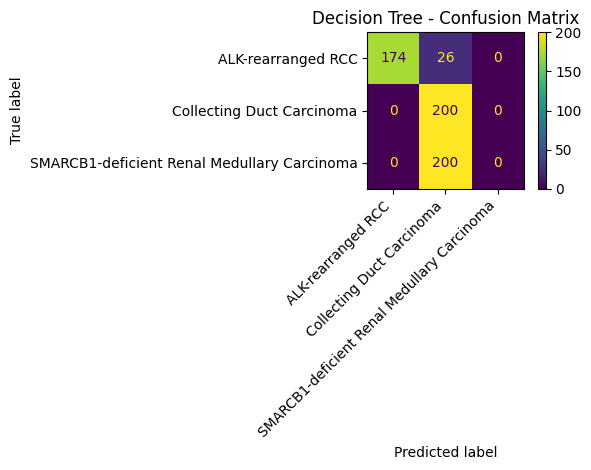

|--- True Necrosis <= 0.50
|   |--- class: ALK-rearranged RCC
|--- True Necrosis >  0.50
|   |--- Mucin <= 0.50
|   |   |--- Foamy macrophages <= 0.50
|   |   |   |--- class: Collecting Duct Carcinoma
|   |   |--- Foamy macrophages >  0.50
|   |   |   |--- class: ALK-rearranged RCC
|   |--- Mucin >  0.50
|   |   |--- class: ALK-rearranged RCC



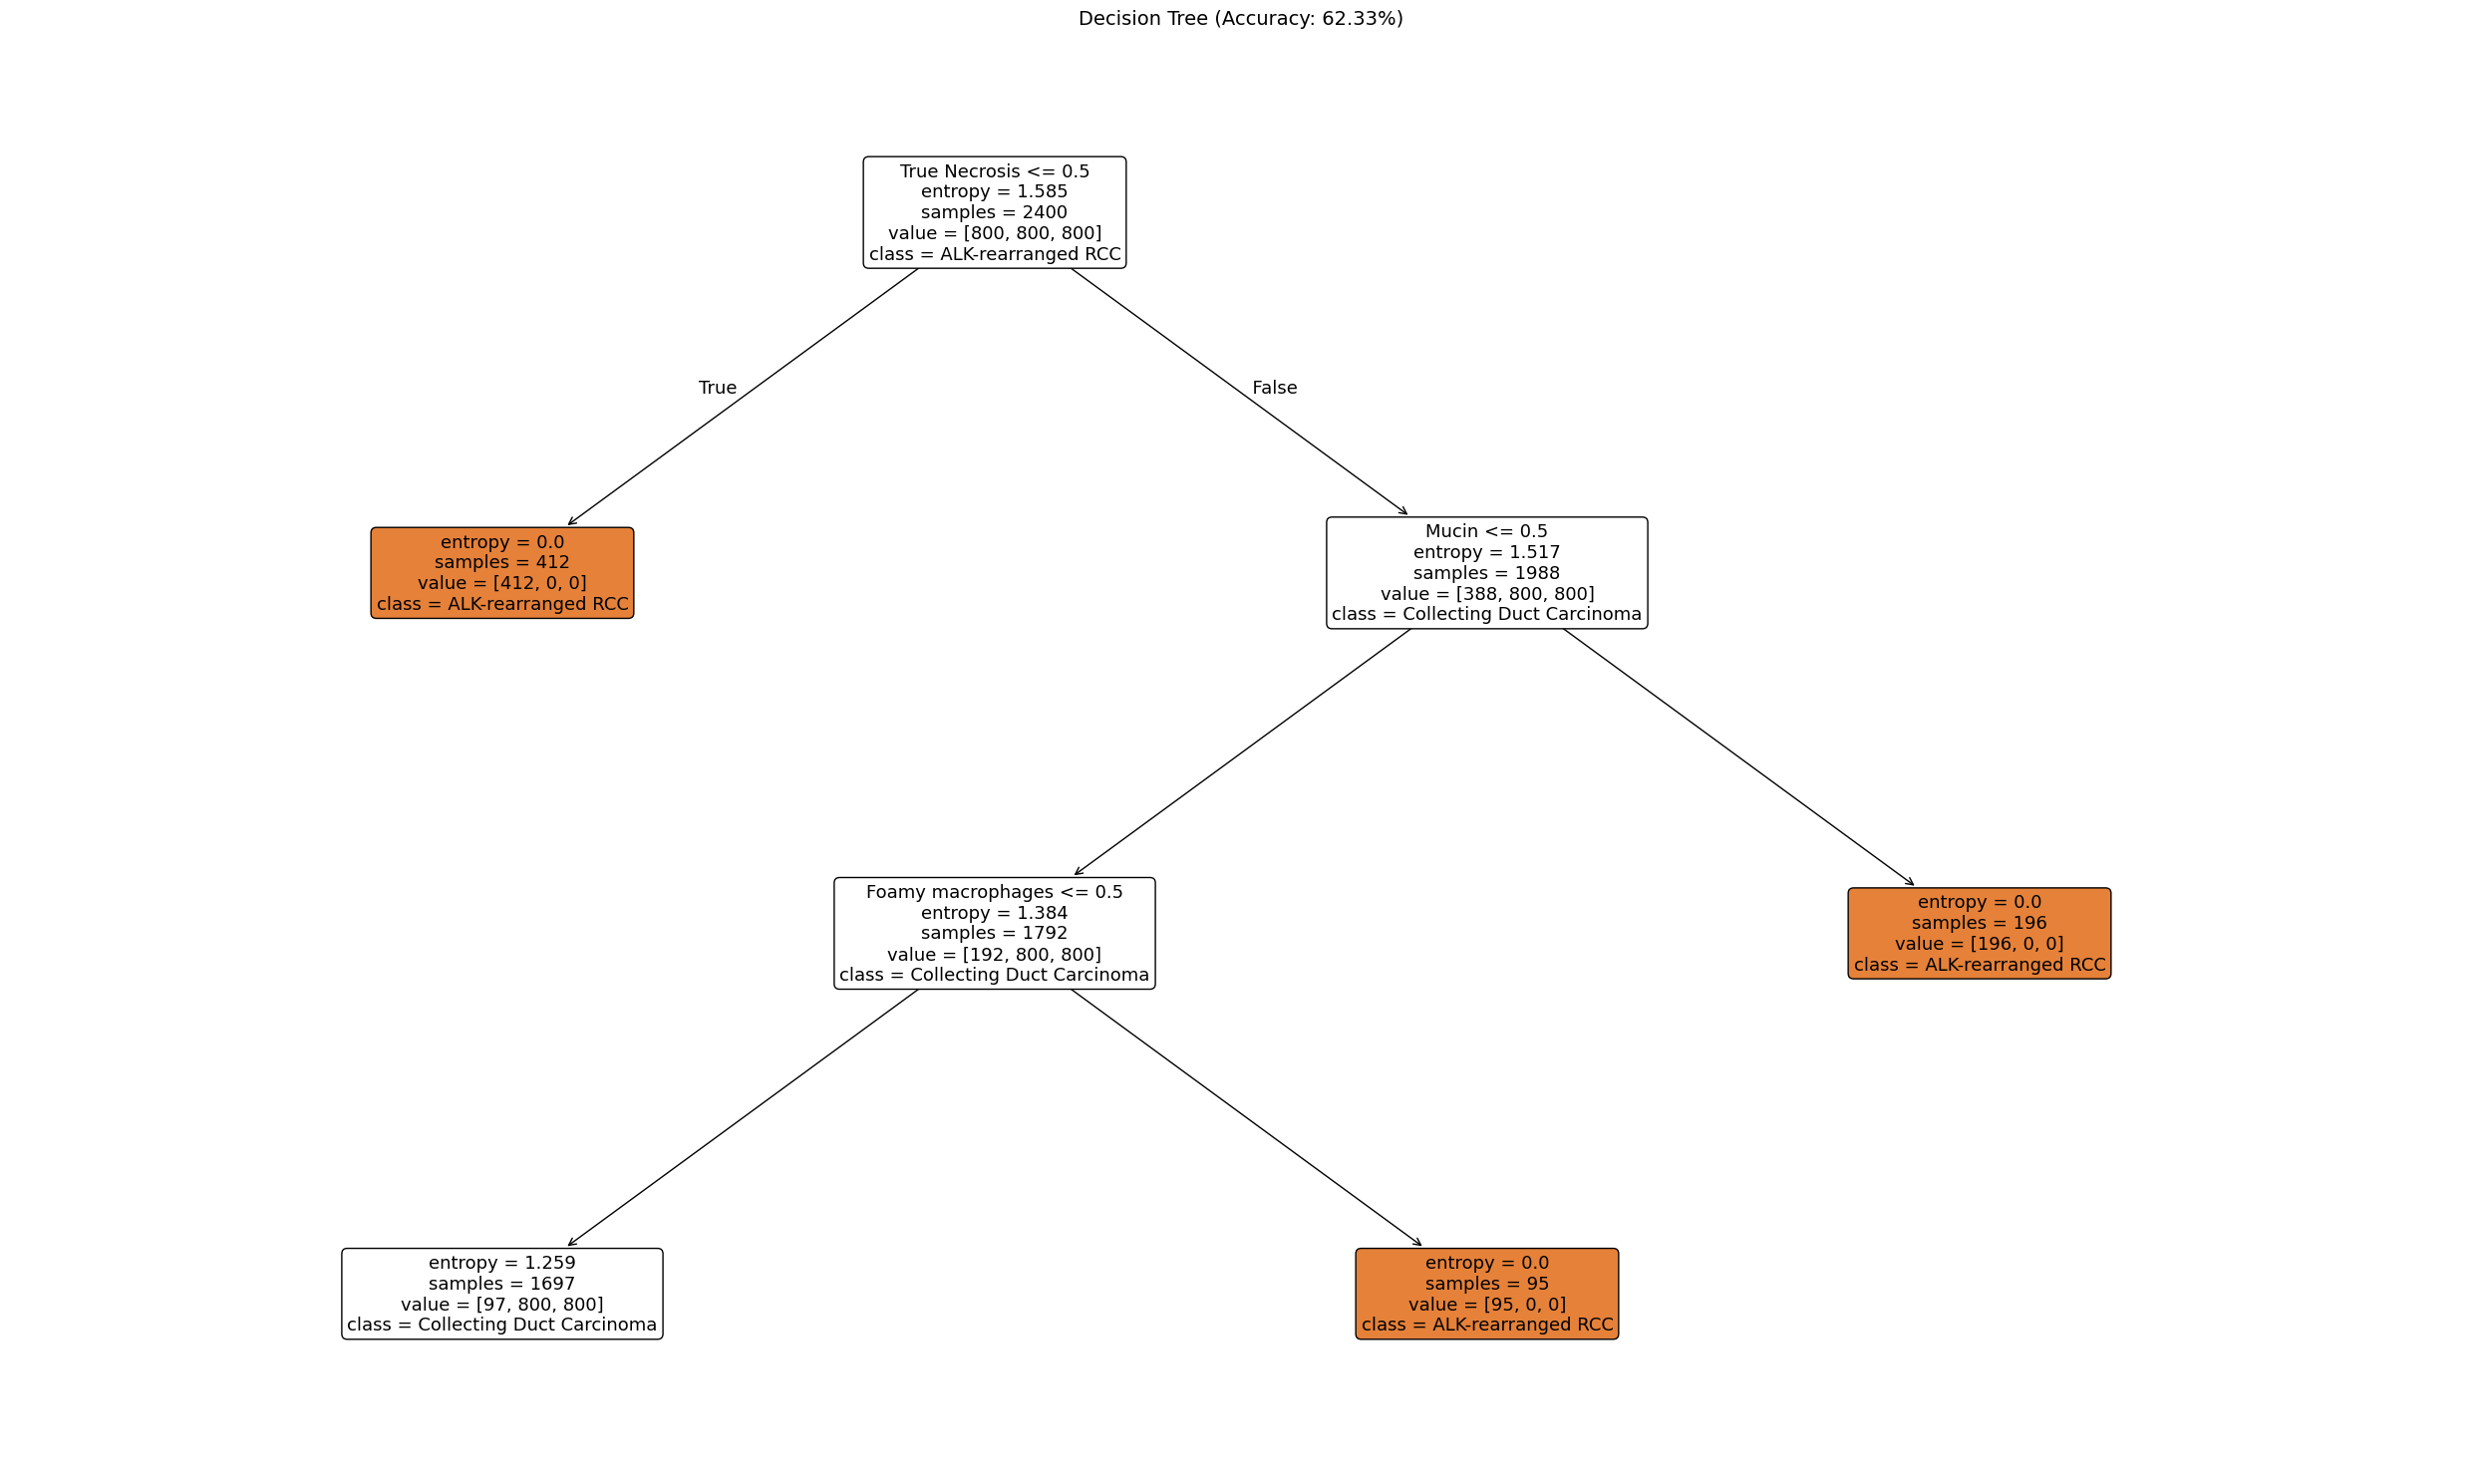

In [163]:
# Decision Tree Model (Simplified for binary data)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Select specific dataset to make decision tree
ds = morph_ds

# Load and prepare data
X = ds.drop(columns=["Subtype"]) 
y = ds["Subtype"] # target prediction
feature_names = X.columns.tolist()

# Split data into train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=8)
    # Stratify y makes sure target variable (lables) is evenly distributed in training and testing (useful for unbalanced datasets)

# Initialize Decsion Tree classifer 
tree = DecisionTreeClassifier(
    max_depth = 3,
    min_samples_split = 10, # minimum number required to split a node
    min_samples_leaf=1, # minimum samples rquired at a leaf node
    max_leaf_nodes = 6,
    criterion="gini",  # or "entropy" (log_loss in newer versions)
    random_state=42,
    class_weight=None,  # try "balanced" for skewed data
    min_weight_fraction_leaf=0,
    ccp_alpha=0.0 # controls pruning strength to reduce overfitting
)

# Hyperparameter tuning, GridSearch will test every comination (this will overwrite some settings in the above initialized settings) 
param_grid = {
    "min_samples_leaf": [1, 5, 10, 20],
    "min_samples_split": [2, 10, 20],
    "criterion": ["entropy","gini"]
}

# Grid search to find the best combination of hyper-parameters to achieve hihg accuracy without overfitting
gs = GridSearchCV(tree, param_grid, scoring="accuracy", cv=5, n_jobs=-1)
    # n_jobs --> controls number of CPU cores used for parallel processing (speeds up hyperparameter tuning)
gs.fit(X_train, y_train)

print("Best params:", gs.best_params_)
print("Best CV Accuracy:", gs.best_score_)
print(gs.best_estimator_)

# Evaluate on test set
best_tree = gs.best_estimator_
pred = best_tree.predict(X_test)
print("\n" + classification_report(y_test, pred))

# Confusion Matrix
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay.from_predictions(y_test, pred)
plt.title("Decision Tree - Confusion Matrix")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print text representation of tree
print(export_text(best_tree, feature_names=feature_names, max_depth=3))

# Visualize the tree
class_names = np.unique(y_train).astype(str)

plt.figure(figsize=(25, 15))
plot_tree(best_tree, feature_names=feature_names, class_names=class_names,
          filled=True, rounded=True, fontsize=13, max_depth=5, proportion=False)
plt.title(f"Decision Tree (Accuracy: {best_tree.score(X_test, y_test):.2%})", fontsize=14)
plt.tight_layout()
plt.show()

In [164]:
# Verify order of subtypes
print(f"Order of subtype values: \n {best_tree.classes_}")

Order of subtype values: 
 ['ALK-rearranged RCC' 'Collecting Duct Carcinoma'
 'SMARCB1-deficient Renal Medullary Carcinoma']


In [165]:
# Retrieving what samples are in each leaf
X_array = X_train if isinstance(X_train, np.ndarray) else X_train.values
y_array = y_train if isinstance(y_train, np.ndarray) else y_train.values

# Get leaf node ID for each sample
leaf_ids = best_tree.apply(X_array)

# Create dataframe with features + labels + leaf id
df_leaves = pd.DataFrame(X_array, columns=feature_names)
df_leaves["Subtype"] = y_array
df_leaves["LeafNode"] = leaf_ids

# Dictionary: leaf node → dataframe of samples in that leaf
leaf_dfs = {
    leaf_id: df_leaves[df_leaves["LeafNode"] == leaf_id]
    for leaf_id in np.unique(leaf_ids)
}

# Example: view one leaf
example_leaf = list(leaf_dfs.keys())[0]
leaf_dfs[example_leaf].head()


/Users/ryantso/miniconda3/envs/berman/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


,Cystic,Tubular,Tubulocystic,Cribriform/Adenocarcinoma-like,Sieve-like with crystals,Solid/Nested,Papillary/Tubulopapillary,Infiltrative,Spindle Shaped,Low,...,Basophilic stippling,Thick fibromuscular stroma,Desmoplastic stroma,Foamy macrophages,Mucin,Calcium oxalate crystals,End-stage renal disease background,True Necrosis,Subtype,LeafNode
10,0,0,0,1,0,1,1,1,0,0,...,0,0,1,0,1,0,0,0,ALK-rearranged RCC,1
14,0,0,0,1,0,1,1,1,0,0,...,0,0,1,1,0,0,0,0,ALK-rearranged RCC,1
36,0,0,0,1,0,1,1,1,0,0,...,0,0,1,1,0,0,0,0,ALK-rearranged RCC,1
40,0,0,0,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,ALK-rearranged RCC,1
64,0,0,0,1,0,1,0,1,0,0,...,0,0,1,1,0,0,0,0,ALK-rearranged RCC,1


In [166]:
for leaf, df in leaf_dfs.items():
    print(f"\nLeaf {leaf}")
    print(df["Subtype"].value_counts())




Leaf 1
Subtype
ALK-rearranged RCC    412
Name: count, dtype: int64

Leaf 4
Subtype
ALK-rearranged RCC    196
Name: count, dtype: int64

Leaf 5
Subtype
SMARCB1-deficient Renal Medullary Carcinoma    800
ALK-rearranged RCC                              97
Name: count, dtype: int64

Leaf 6
Subtype
ALK-rearranged RCC    95
Name: count, dtype: int64


In [167]:
is_leaf = best_tree.tree_.children_left == -1
leaf_nodes = np.where(is_leaf)[0]

leaf_dfs = {
    leaf: df_leaves[df_leaves["LeafNode"] == leaf]
    for leaf in leaf_nodes
}

In [168]:
import pandas as pd
import numpy as np

# Build a DataFrame of your training data
if isinstance(X_train, pd.DataFrame):
    dfX = X_train.copy()
    feat_cols = dfX.columns.tolist()
else:
    dfX = pd.DataFrame(X_train, columns=feature_names)
    feat_cols = feature_names

# Leaf id for each sample
leaf_id = best_tree.apply(dfX.values)

# Add leaf + label (optional but useful)
dfX["LeafNode"] = leaf_id
dfX["Subtype"] = y_train.values if isinstance(y_train, pd.Series) else y_train

# Feature means per leaf
leaf_feature_means = dfX.groupby("LeafNode")[feat_cols].mean()

# (Optional) also add sample count per leaf
leaf_counts = dfX.groupby("LeafNode").size().rename("n_samples")

# Combine into one table
leaf_summary = leaf_feature_means.join(leaf_counts)

leaf_summary.head()


/Users/ryantso/miniconda3/envs/berman/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


,Cystic,Tubular,Tubulocystic,Cribriform/Adenocarcinoma-like,Sieve-like with crystals,Solid/Nested,Papillary/Tubulopapillary,Infiltrative,Spindle Shaped,Low,...,Plant-like cell membrane,Basophilic stippling,Thick fibromuscular stroma,Desmoplastic stroma,Foamy macrophages,Mucin,Calcium oxalate crystals,End-stage renal disease background,True Necrosis,n_samples
LeafNode,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,1.0,0.0,1.0,0.444175,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.5,0.48301,0.0,0.0,0.0,412
4,0.0,0.0,0.0,1.0,0.0,1.0,0.454082,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.515306,1.0,0.0,0.0,1.0,196
5,0.0,0.464349,0.0,1.0,0.0,0.52858,0.51208,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1697
6,0.0,0.0,0.0,1.0,0.0,1.0,0.526316,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,95


In [169]:
type(X_train)

pandas.core.frame.DataFrame

In [170]:
# Create comprehensive dataframes for each leaf node - Ryan 
# Prepare the training data
train_df = X_train

# Add the target labels and leaf node assignments
train_df['Subtype'] = y_train.values if hasattr(y_train, 'values') else y_train
train_df['LeafNode'] = best_tree.apply(train_df[feature_names].values)

leaf_nodes = train_df['LeafNode'].unique()


/Users/ryantso/miniconda3/envs/berman/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [171]:
# Create a unique dataframe for each 
leaf_dataset = {}
for leaf_node in leaf_nodes:
    leaf_df = synthetic_df 

In [172]:
# Get only the actual leaf nodes (not internal nodes)
# Leaf mask is all the nodes (which one are the children / leaf nodes)
leaf_mask = best_tree.tree_.children_left == -1
actual_leaf_nodes = np.where(leaf_mask)[0]

print(actual_leaf_nodes)

[1 4 5 6]


In [194]:
# Create a unique dataframe for each node - checked (saved within a dictionary)
leaf_dataframes = {}
# Loops through all the leaf nodes 
for leaf_node in leaf_nodes:
    # Grabs the index / primary key for each patient that has the appropriate assigned Leaf Node number
    leaf_index = train_df.index[train_df["LeafNode"]==leaf_node]
    #print(leaf_node)
    #print(leaf_index)
    # grabs the entire patient biomarker panel from the original synthetic dataset based on index 
    leaf_df = synthetic_df.loc[leaf_index]
    # Adds leaf node as the key, and dataframe into the dictionary
    leaf_dataframes[leaf_node] = leaf_df

leaf_dataframes.keys()

dict_keys([5, 1, 4, 6])

In [ ]:
'''# Create dictionary of dataframes for each leaf node - Might not be correct, double check
# was initially missing the creation of the entire dataframe from the original combined synthetic dataframe
leaf_dataframes = {}
for leaf_id in actual_leaf_nodes:
    leaf_samples = train_df[train_df['LeafNode'] == leaf_id].copy()
    leaf_dataframes[leaf_id] = leaf_samples

leaf_dataframes.keys()'''

dict_keys([1, 4, 5, 6])

In [195]:
# Display summary information for each leaf
print("Summary of samples in each leaf node:\n")
for leaf_id, df in leaf_dataframes.items():
    print(f"=== Leaf Node {leaf_id} ===")
    print(f"Total samples: {len(df)}")
    print("Subtype distribution:")
    print(df['Subtype'].value_counts())
    print(f"Predicted class: {best_tree.classes_[np.argmax(best_tree.tree_.value[leaf_id])]}")
    print()

# Example: Access samples from a specific leaf node
if leaf_dataframes:
    example_leaf = list(leaf_dataframes.keys())[0]
    print(f"Example - First 5 samples from Leaf {example_leaf}:")
    print(leaf_dataframes[example_leaf][['Subtype'] + feature_names[:5]].head())


Summary of samples in each leaf node:

=== Leaf Node 5 ===
Total samples: 1697
Subtype distribution:
Subtype
SMARCB1-deficient Renal Medullary Carcinoma    800
ALK-rearranged RCC                              97
Name: count, dtype: int64
Predicted class: Collecting Duct Carcinoma

=== Leaf Node 1 ===
Total samples: 412
Subtype distribution:
Subtype
ALK-rearranged RCC    412
Name: count, dtype: int64
Predicted class: ALK-rearranged RCC

=== Leaf Node 4 ===
Total samples: 196
Subtype distribution:
Subtype
ALK-rearranged RCC    196
Name: count, dtype: int64
Predicted class: ALK-rearranged RCC

=== Leaf Node 6 ===
Total samples: 95
Subtype distribution:
Subtype
ALK-rearranged RCC    95
Name: count, dtype: int64
Predicted class: ALK-rearranged RCC

Example - First 5 samples from Leaf 5:
                                          Subtype Cystic Tubular Tubulocystic  \
1228  SMARCB1-deficient Renal Medullary Carcinoma      0       1            0   
1937  SMARCB1-deficient Renal Medullary Carcin

In [200]:
# VERY IMPORTANT --> Create IHC dataset from above leaf_dataset dictionary
print(leaf_dataframes.keys())

# ACTION REQUIRED --> Adjust the key to select desired leaf to examine
select_leaf = leaf_dataframes[5][["Subtype"] + IHC_features]

# They all use the same 
select_leaf

dict_keys([5, 1, 4, 6])


,Subtype,PAX8,CAIX,CD10,CK7,AMACR,CD117,Vimentin,TFE3,Cathepsin K,...,SMARCB1 (INI1),OCT 3/4,GATA3,CK20,CK-Pan,EMA,LMWCK,WT1,CD57,p63
1228,SMARCB1-deficient Renal Medullary Carcinoma,1,0,NaN,1,NaN,NaN,1,0,0,...,0,1,0,0,1,1,1,0,0,0
1937,SMARCB1-deficient Renal Medullary Carcinoma,1,0,NaN,1,NaN,NaN,1,0,0,...,0,1,0,1,1,1,1,0,0,0
702,Collecting Duct Carcinoma,1,1,0,0,1,0,1,0,0,...,1,0,0,0,1,1,1,0,1,1
941,Collecting Duct Carcinoma,1,0,1,0,1,0,1,0,0,...,1,0,0,0,1,1,1,0,0,0
1085,SMARCB1-deficient Renal Medullary Carcinoma,1,0,NaN,1,NaN,NaN,1,0,0,...,0,1,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Collecting Duct Carcinoma,1,1,1,1,1,0,0,0,0,...,1,0,0,0,1,1,1,0,0,0
1504,SMARCB1-deficient Renal Medullary Carcinoma,1,0,NaN,1,NaN,NaN,1,0,0,...,0,0,0,1,1,1,1,0,0,1
1995,SMARCB1-deficient Renal Medullary Carcinoma,1,0,NaN,1,NaN,NaN,1,0,0,...,0,0,0,1,1,1,1,0,0,1
1509,SMARCB1-deficient Renal Medullary Carcinoma,1,0,NaN,1,NaN,NaN,1,0,0,...,0,0,0,0,1,1,1,0,0,1


Best params: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Accuracy: 1.0
DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=6,
                       min_weight_fraction_leaf=0, random_state=42)

                    precision    recall  f1-score   support

ALK-rearranged RCC       1.00      1.00      1.00        40

          accuracy                           1.00        40
         macro avg       1.00      1.00      1.00        40
      weighted avg       1.00      1.00      1.00        40



/Users/ryantso/miniconda3/envs/berman/lib/python3.11/site-packages/sklearn/metrics/_classification.py:620: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


<Figure size 1000x800 with 0 Axes>

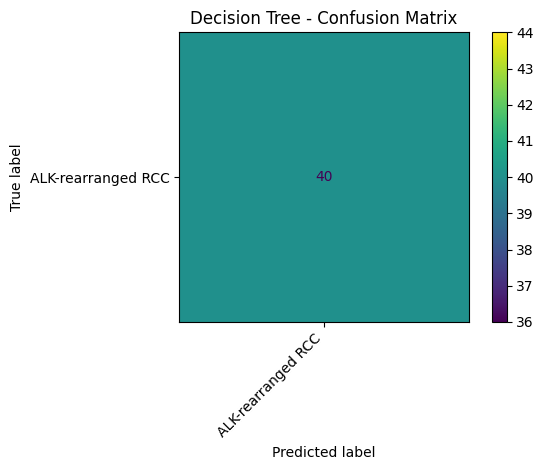

|--- class: 0



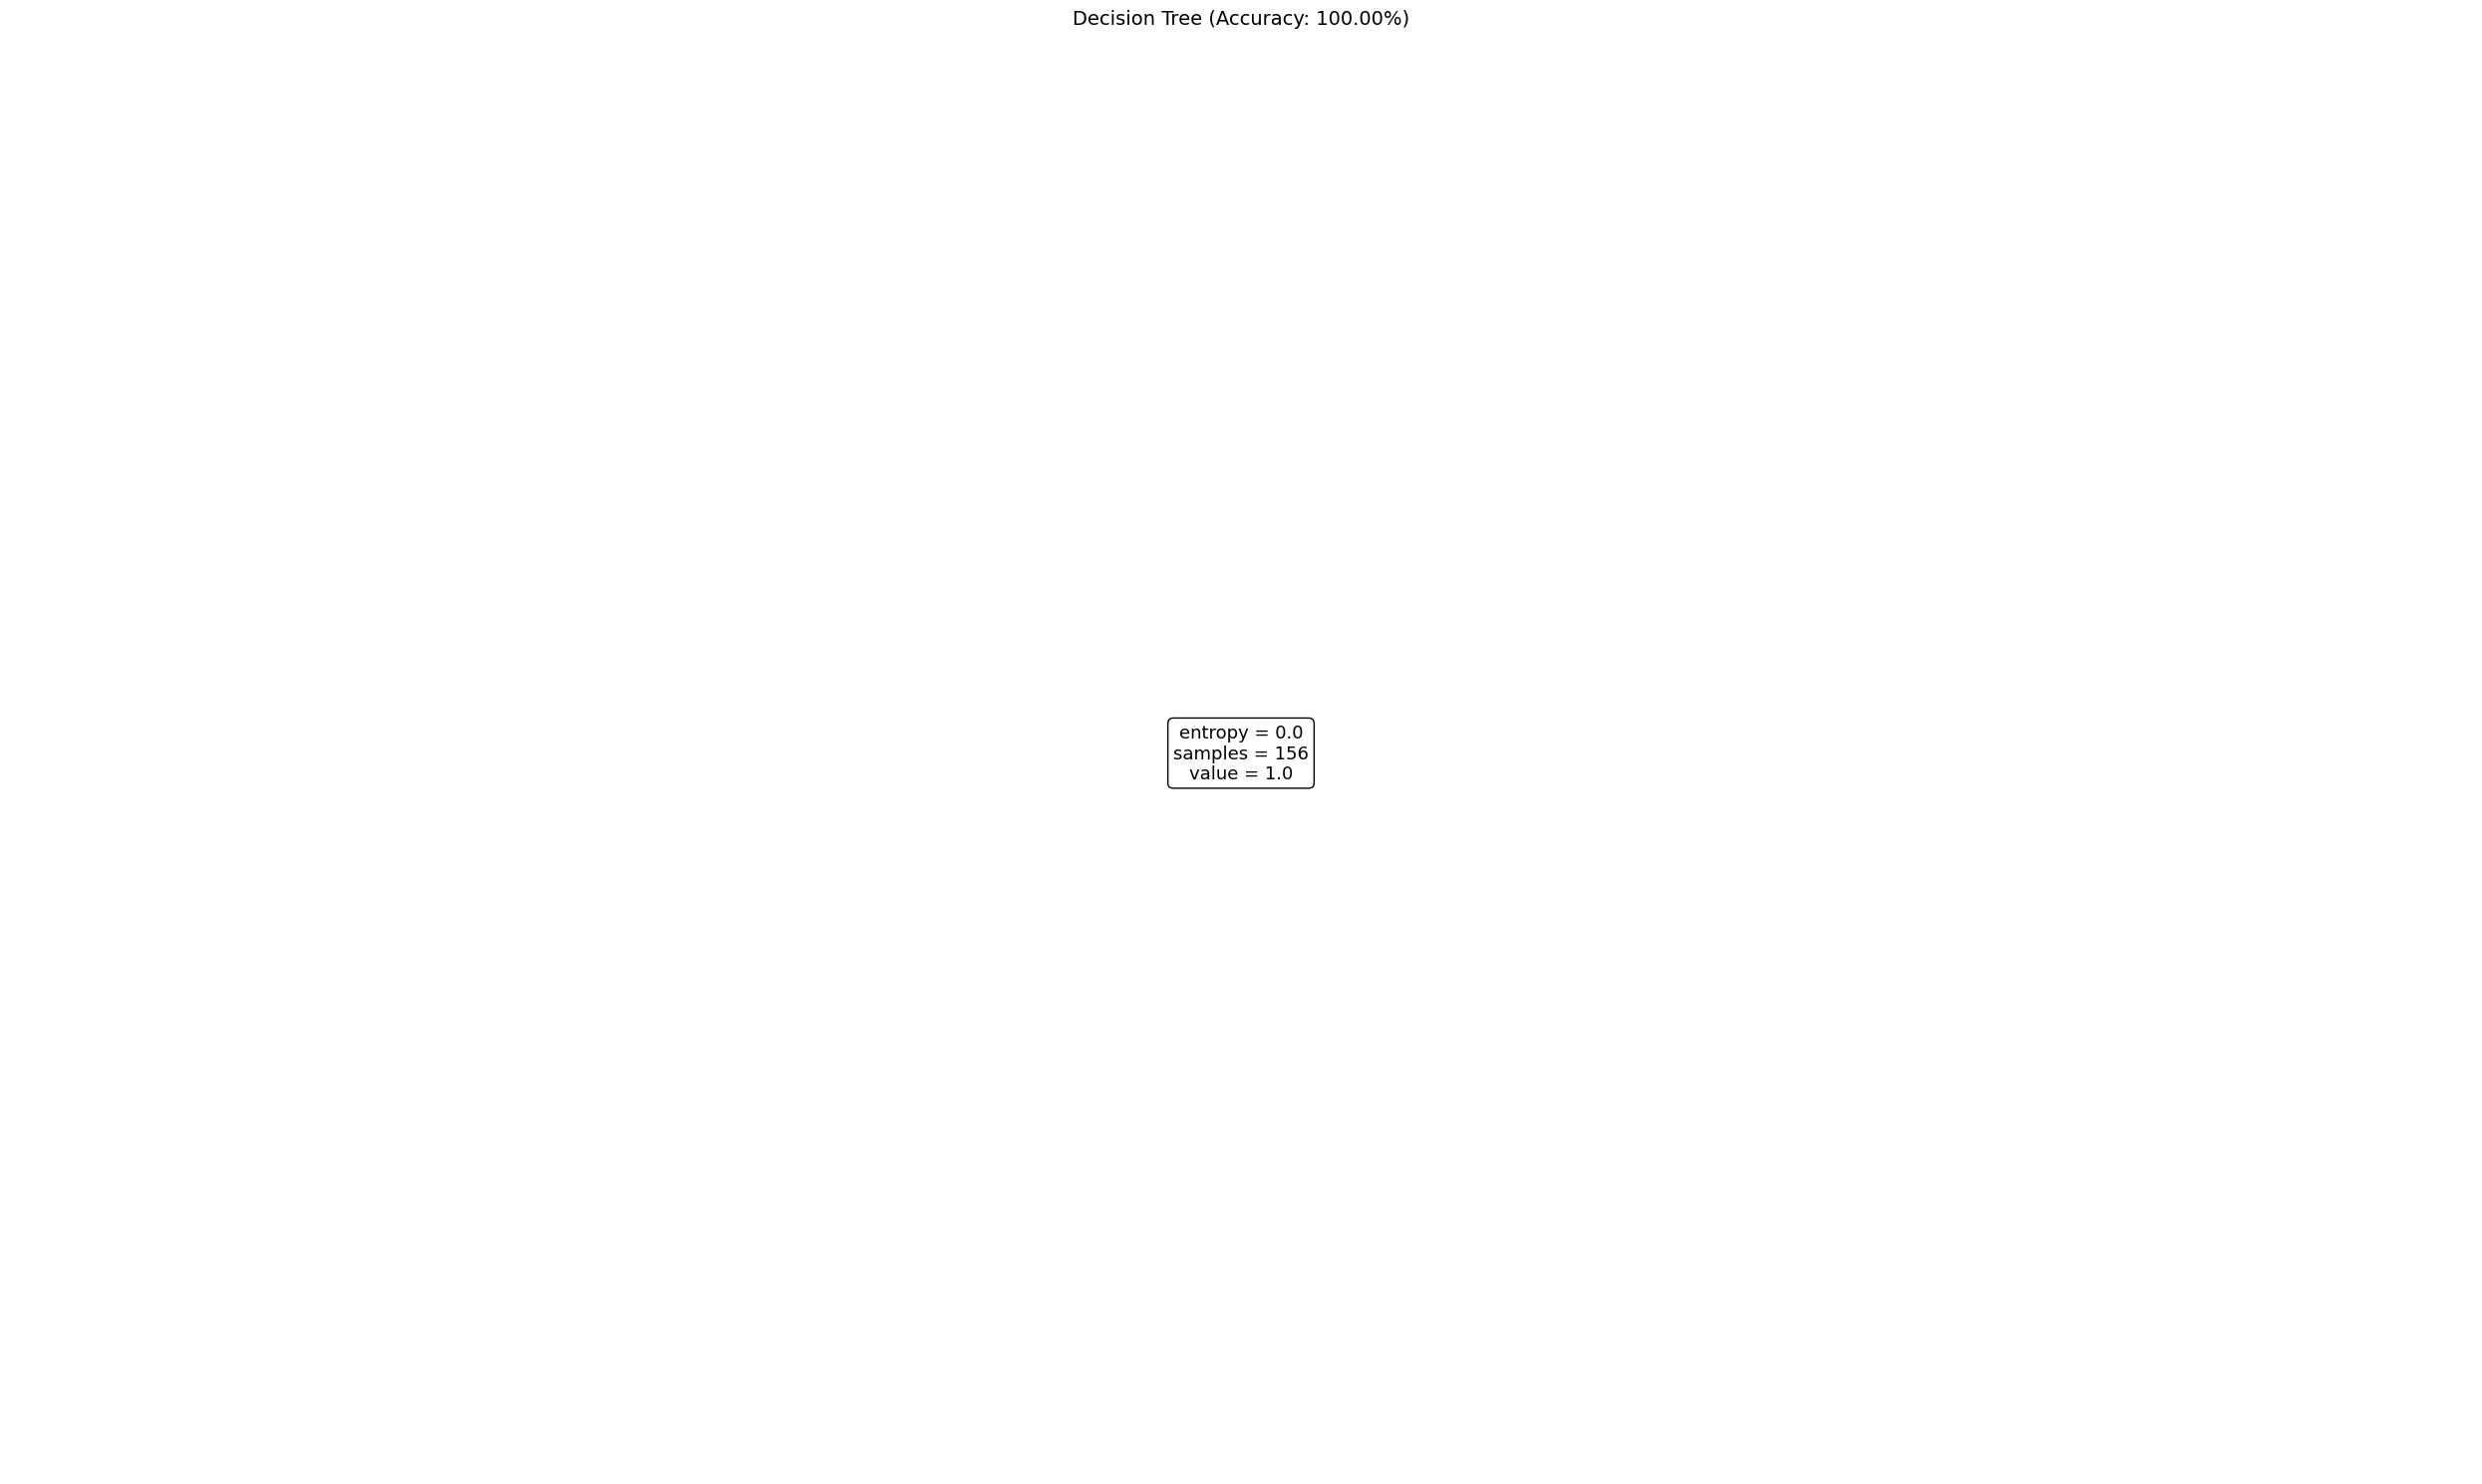

In [198]:
# Decision Tree Model (Simplified for binary data)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Select specific dataset to make decision tree
ds = select_leaf

# Load and prepare data
X = ds.drop(columns=["Subtype"]) 
y = ds["Subtype"] # target prediction
feature_names = X.columns.tolist()

# Split data into train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=8)
    # Stratify y makes sure target variable (lables) is evenly distributed in training and testing (useful for unbalanced datasets)

# Initialize Decsion Tree classifer 
tree = DecisionTreeClassifier(
    max_depth = 3,
    min_samples_split = 10, # minimum number required to split a node
    min_samples_leaf=1, # minimum samples rquired at a leaf node
    max_leaf_nodes = 6,
    criterion="gini",  # or "entropy" (log_loss in newer versions)
    random_state=42,
    class_weight=None,  # try "balanced" for skewed data
    min_weight_fraction_leaf=0,
    ccp_alpha=0.0 # controls pruning strength to reduce overfitting
)

# Hyperparameter tuning, GridSearch will test every comination (this will overwrite some settings in the above initialized settings) 
param_grid = {
    "min_samples_leaf": [1, 5, 10, 20],
    "min_samples_split": [2, 10, 20],
    "criterion": ["entropy","gini"]
}

# Grid search to find the best combination of hyper-parameters to achieve hihg accuracy without overfitting
gs = GridSearchCV(tree, param_grid, scoring="accuracy", cv=5, n_jobs=-1)
    # n_jobs --> controls number of CPU cores used for parallel processing (speeds up hyperparameter tuning)
gs.fit(X_train, y_train)

print("Best params:", gs.best_params_)
print("Best CV Accuracy:", gs.best_score_)
print(gs.best_estimator_)

# Evaluate on test set
best_tree = gs.best_estimator_
pred = best_tree.predict(X_test)
print("\n" + classification_report(y_test, pred))

# Confusion Matrix
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay.from_predictions(y_test, pred)
plt.title("Decision Tree - Confusion Matrix")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print text representation of tree
print(export_text(best_tree, feature_names=feature_names, max_depth=3))

# Visualize the tree
class_names = np.unique(y_train).astype(str)

plt.figure(figsize=(25, 15))
plot_tree(best_tree, feature_names=feature_names, class_names=class_names,
          filled=True, rounded=True, fontsize=13, max_depth=5, proportion=False)
plt.title(f"Decision Tree (Accuracy: {best_tree.score(X_test, y_test):.2%})", fontsize=14)
plt.tight_layout()
plt.show() 